In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
raisin = pd.read_csv("/content/drive/MyDrive/machine_learning_challenge/ML-challenge/EX_challenging_problems/02_raisin_classification/Raisin_Dataset.csv")
raisin.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [4]:
# Which type does the dataframe have?

print(pd.unique(raisin["Class"]))

['Kecimen' 'Besni']


In [5]:
raisin_input  = raisin[["MajorAxisLength", "MinorAxisLength", "Eccentricity", "ConvexArea", "Extent", "Perimeter"]].to_numpy()
raisin_target = raisin["Class"].to_numpy()

In [7]:
raisin_input

array([[4.42246011e+02, 2.53291155e+02, 8.19738392e-01, 9.05460000e+04,
        7.58650579e-01, 1.18404000e+03],
       [4.06690687e+02, 2.43032436e+02, 8.01805234e-01, 7.87890000e+04,
        6.84129570e-01, 1.12178600e+03],
       [4.42267048e+02, 2.66328318e+02, 7.98353619e-01, 9.37170000e+04,
        6.37612812e-01, 1.20857500e+03],
       ...,
       [4.31706981e+02, 2.98837323e+02, 7.21684066e-01, 1.06264000e+05,
        7.41098519e-01, 1.29282800e+03],
       [4.76344094e+02, 2.54176054e+02, 8.45738510e-01, 9.76530000e+04,
        6.58798253e-01, 1.25854800e+03],
       [5.12081774e+02, 2.15271976e+02, 9.07345395e-01, 8.91970000e+04,
        6.32019963e-01, 1.27286200e+03]])

<ipython-input-14-6605d83411ef>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = raisin.corr()


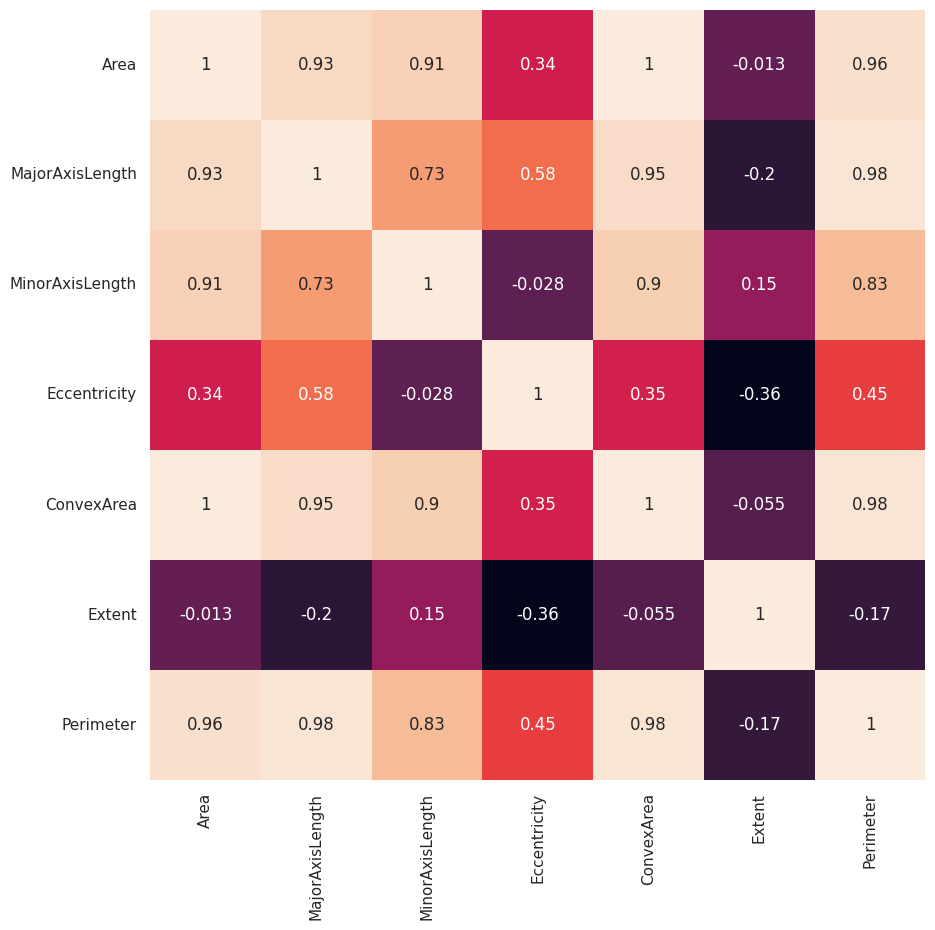

In [14]:
import seaborn as sns

# correlation matrix (Just check for fun)
correlation = raisin.corr()

# heatmap
plt.figure(figsize = (10,10))
sns.set(font_scale = 1)
sns.heatmap(correlation, annot = True, cbar = False)
plt.show()

# At least, we can know Area, MajorAxisLength, MinorAxisLength, ConvexAre have relatively high correlations each other

In [16]:
raisin.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

In [18]:
# Create sets
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(raisin_input, raisin_target, random_state = 13)

In [19]:
# Standardize
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled  = ss.transform(test_input)

[[2, 0.9081481481481481, 0.7777777777777778], [3, 0.914074074074074, 0.8577777777777778], [4, 0.8977777777777778, 0.8488888888888889], [5, 0.88, 0.8666666666666667], [6, 0.8755555555555555, 0.8533333333333334], [7, 0.8814814814814815, 0.8488888888888889], [8, 0.8770370370370371, 0.8533333333333334], [9, 0.8740740740740741, 0.8666666666666667], [10, 0.8740740740740741, 0.8577777777777778], [11, 0.8740740740740741, 0.8622222222222222], [12, 0.8755555555555555, 0.8666666666666667], [13, 0.8711111111111111, 0.8622222222222222], [14, 0.8696296296296296, 0.8577777777777778], [15, 0.8696296296296296, 0.8622222222222222], [16, 0.8725925925925926, 0.8622222222222222], [17, 0.8711111111111111, 0.8577777777777778], [18, 0.8711111111111111, 0.8666666666666667], [19, 0.8681481481481481, 0.8711111111111111], [20, 0.8681481481481481, 0.8755555555555555], [21, 0.8651851851851852, 0.8711111111111111], [22, 0.8681481481481481, 0.8666666666666667], [23, 0.8622222222222222, 0.8666666666666667], [24, 0.871

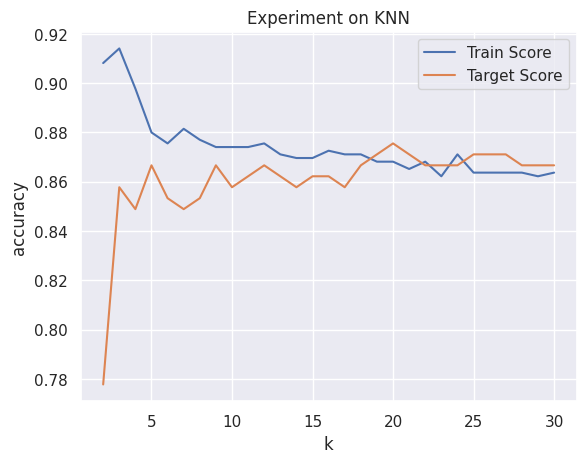

In [38]:
# K-Nearest Neighbor Classifier
from sklearn.neighbors import KNeighborsClassifier

def experiment_knn(k_value):
  kn = KNeighborsClassifier(n_neighbors = k_value)
  kn.fit(train_scaled, train_target)
  result = [
      kn.score(train_scaled, train_target),
      kn.score(test_scaled, test_target)
  ]
  return result

# Find the best k value
score_list = []
for _k_value_trial in range(2, 30 + 1):
  result = experiment_knn(_k_value_trial)
  score_list.append([_k_value_trial, result[0], result[1]])
print(score_list)

# visualize
plt.plot([score[0] for score in score_list], [score[1] for score in score_list], label = "Train Score")
plt.plot([score[0] for score in score_list], [score[2] for score in score_list], label = "Target Score")
plt.xlabel("k")
# plt.xticks([score[0] for score in score_list])
plt.ylabel("accuracy")
plt.title("Experiment on KNN")
plt.legend()

plt.show()

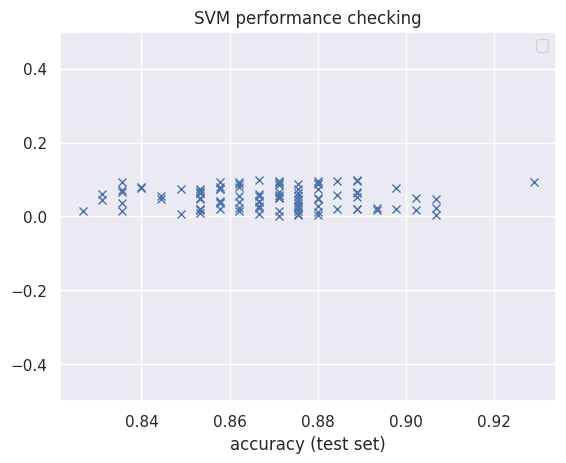

avg accuracy : 0.8689333333333338
max accuracy : 0.9288888888888889
min accuracy : 0.8266666666666667


In [55]:
# SVM

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score      # manually import, unify the performance check
from sklearn.metrics import confusion_matrix
import random

def experiment_svc(random_state):

  # mix
  train_input, test_input, train_target, test_target = train_test_split(raisin_input, raisin_target)
  ss = StandardScaler()
  ss.fit(train_input)
  train_scaled = ss.transform(train_input)
  test_scaled  = ss.transform(test_input)

  svc_model = SVC(random_state = random_state)
  svc_model.fit(train_scaled, train_target)
  svc_model_prediction = svc_model.predict(test_scaled)

  return accuracy_score(test_target, svc_model_prediction)
  # print(confusion_matrix(test_target, svc_model_prediction))

accuracy_list = []
trial = 100
for _seq in range(trial):
  accuracy_list.append(experiment_svc(random_state = random.randint(1, 100)))

y_dummy_list = [random.random()/10 for _rand in range(trial)]
ax = plt.gca()
ax.set_ylim([-0.5, 0.5])
plt.plot(accuracy_list, y_dummy_list, 'x')
plt.xlabel("accuracy (test set)")
plt.title("SVM performance checking")
plt.legend()
plt.show()      # we don't need to take care about Matplotlib artist warning. Just ignore.

print(f"avg accuracy : {sum(accuracy_list) / len(accuracy_list)}")
print(f"max accuracy : {max(accuracy_list)}")
print(f"min accuracy : {min(accuracy_list)}")

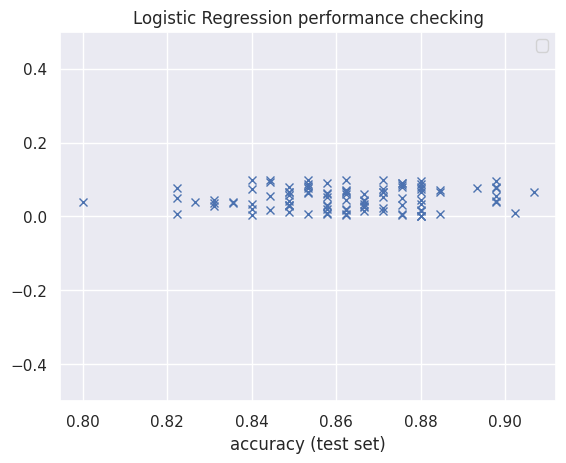

avg accuracy : 0.8626222222222224
max accuracy : 0.9066666666666666
min accuracy : 0.8


In [56]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

def experiment_lr():

  # mix
  train_input, test_input, train_target, test_target = train_test_split(raisin_input, raisin_target)
  ss = StandardScaler()
  ss.fit(train_input)
  train_scaled = ss.transform(train_input)
  test_scaled  = ss.transform(test_input)

  lr_model = LogisticRegression()
  lr_model.fit(train_scaled, train_target)
  lr_model_prediction = lr_model.predict(test_scaled)

  return accuracy_score(test_target, lr_model_prediction)

accuracy_list = []
trial = 100
for _seq in range(trial):
  accuracy_list.append(experiment_lr())

y_dummy_list = [random.random()/10 for _rand in range(trial)]
ax = plt.gca()
ax.set_ylim([-0.5, 0.5])
plt.plot(accuracy_list, y_dummy_list, 'x')
plt.xlabel("accuracy (test set)")
plt.title("Logistic Regression performance checking")
plt.legend()
plt.show()      # we don't need to take care about Matplotlib artist warning. Just ignore.

print(f"avg accuracy : {sum(accuracy_list) / len(accuracy_list)}")
print(f"max accuracy : {max(accuracy_list)}")
print(f"min accuracy : {min(accuracy_list)}")

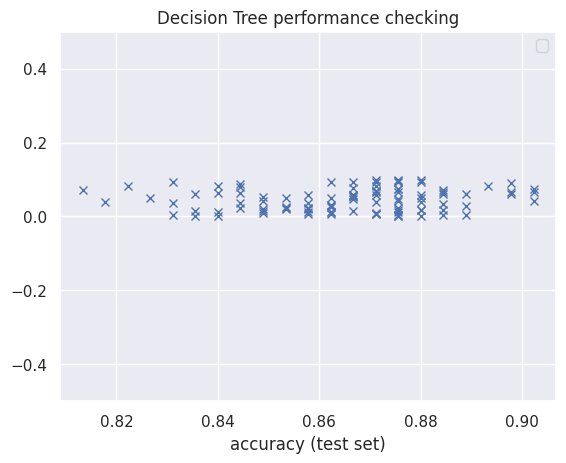

avg accuracy : 0.8650222222222219
max accuracy : 0.9022222222222223
min accuracy : 0.8133333333333334


In [57]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

def experiment_dt():

  # mix
  train_input, test_input, train_target, test_target = train_test_split(raisin_input, raisin_target)
  ss = StandardScaler()
  ss.fit(train_input)
  train_scaled = ss.transform(train_input)
  test_scaled  = ss.transform(test_input)

  dt_model = DecisionTreeClassifier()
  dt_model.fit(train_scaled, train_target)
  dt_model_prediction = dt_model.predict(test_scaled)

  return accuracy_score(test_target, dt_model_prediction)

accuracy_list = []
trial = 100
for _seq in range(trial):
  accuracy_list.append(experiment_lr())

y_dummy_list = [random.random()/10 for _rand in range(trial)]
ax = plt.gca()
ax.set_ylim([-0.5, 0.5])
plt.plot(accuracy_list, y_dummy_list, 'x')
plt.xlabel("accuracy (test set)")
plt.title("Decision Tree performance checking")
plt.legend()
plt.show()      # we don't need to take care about Matplotlib artist warning. Just ignore.

print(f"avg accuracy : {sum(accuracy_list) / len(accuracy_list)}")
print(f"max accuracy : {max(accuracy_list)}")
print(f"min accuracy : {min(accuracy_list)}")

max accuracy: 0.8657777777777778 when 26


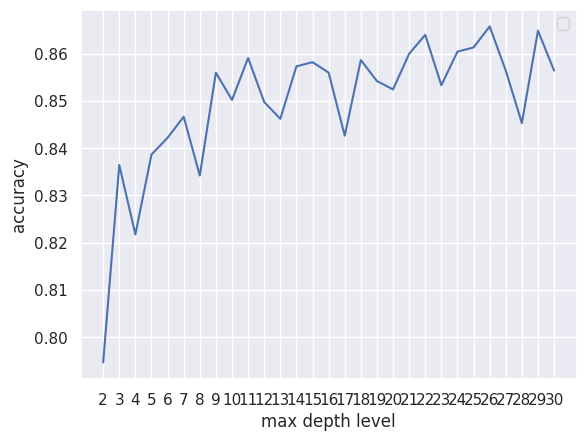

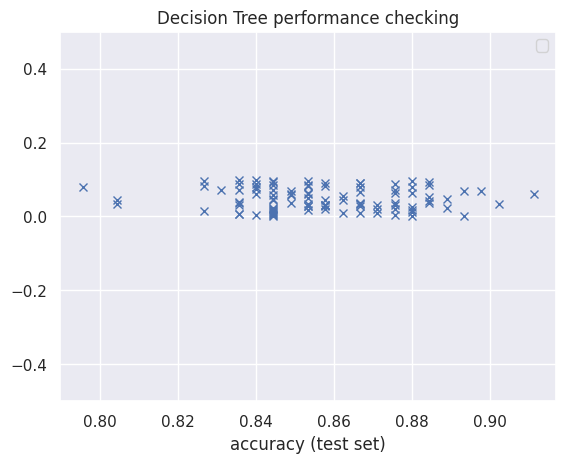

avg accuracy : 0.8572888888888888
max accuracy : 0.9111111111111111
min accuracy : 0.7955555555555556


In [62]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

def experiment_rf(estimator):

  # mix
  train_input, test_input, train_target, test_target = train_test_split(raisin_input, raisin_target)
  ss = StandardScaler()
  ss.fit(train_input)
  train_scaled = ss.transform(train_input)
  test_scaled  = ss.transform(test_input)

  rf_model = RandomForestClassifier(n_estimators = estimator)
  rf_model.fit(train_scaled, train_target)
  rf_model_prediction = rf_model.predict(test_scaled)

  return accuracy_score(test_target, rf_model_prediction)

# Which estimator is optimized 


average_accuracy_list = []
_repeat_qty           = 10
_max_estimator        = 30

for _estimator_trial in range(2, _max_estimator + 1):
  temp = 0
  for _trial in range(_repeat_qty):
    temp += experiment_rf(estimator = _estimator_trial)
  average_accuracy_list.append(temp / _repeat_qty)

print(f"max accuracy: {max(average_accuracy_list)} when {average_accuracy_list.index(max(average_accuracy_list)) + 2}")

plt.plot(range(2, _max_estimator + 1), average_accuracy_list)
plt.xticks(range(2, _max_estimator + 1, 1))
plt.ylabel("accuracy")
plt.xlabel("max depth level")
plt.legend()
plt.show()

# Go!

accuracy_list = []
trial = 100
for _seq in range(trial):
  accuracy_list.append(experiment_rf(estimator = average_accuracy_list.index(max(average_accuracy_list))))

y_dummy_list = [random.random()/10 for _rand in range(trial)]
ax = plt.gca()
ax.set_ylim([-0.5, 0.5])
plt.plot(accuracy_list, y_dummy_list, 'x')
plt.xlabel("accuracy (test set)")
plt.title("Decision Tree performance checking")
plt.legend()
plt.show()      # we don't need to take care about Matplotlib artist warning. Just ignore.

print(f"avg accuracy : {sum(accuracy_list) / len(accuracy_list)}")
print(f"max accuracy : {max(accuracy_list)}")
print(f"min accuracy : {min(accuracy_list)}")

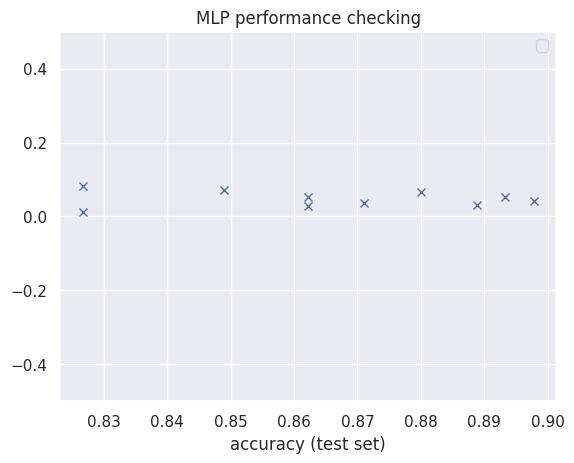

avg accuracy : 0.8657777777777778
max accuracy : 0.8977777777777778
min accuracy : 0.8266666666666667


In [71]:
# Neural Network
from sklearn.neural_network import MLPClassifier

def experiment_mlp(random_state):
  # mix
  train_input, test_input, train_target, test_target = train_test_split(raisin_input, raisin_target)
  ss = StandardScaler()
  ss.fit(train_input)
  train_scaled = ss.transform(train_input)
  test_scaled  = ss.transform(test_input)

  mlp_model = MLPClassifier(random_state = random_state)
  mlp_model.fit(train_scaled, train_target)

  mlp_model_prediction = mlp_model.predict(test_scaled)

  return accuracy_score(test_target, mlp_model_prediction)

accuracy_list = []
trial = 10
for _seq in range(trial):
  accuracy_list.append(experiment_mlp(random_state = random.randint(1, 100)))

y_dummy_list = [random.random()/10 for _rand in range(trial)]
ax = plt.gca()
ax.set_ylim([-0.5, 0.5])
plt.plot(accuracy_list, y_dummy_list, 'x')
plt.xlabel("accuracy (test set)")
plt.title("MLP performance checking")
plt.legend()
plt.show()      # we don't need to take care about Matplotlib artist warning. Just ignore.

print(f"avg accuracy : {sum(accuracy_list) / len(accuracy_list)}")
print(f"max accuracy : {max(accuracy_list)}")
print(f"min accuracy : {min(accuracy_list)}")

In [73]:
# Look closer 'n closer to the confusion matrix (MLP)

train_input, test_input, train_target, test_target = train_test_split(raisin_input, raisin_target)
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled  = ss.transform(test_input)

mlp_model = MLPClassifier(random_state = 0)
mlp_model.fit(train_scaled, train_target)
mlp_model_prediction = mlp_model.predict(test_scaled)

########################################################


['Besni' 'Besni' 'Kecimen' 'Besni' 'Kecimen' 'Kecimen' 'Besni' 'Besni'
 'Kecimen' 'Besni' 'Besni' 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen'
 'Kecimen' 'Besni' 'Kecimen' 'Kecimen' 'Kecimen' 'Besni' 'Besni' 'Besni'
 'Kecimen' 'Besni' 'Besni' 'Besni' 'Besni' 'Besni' 'Besni' 'Besni' 'Besni'
 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen' 'Besni' 'Kecimen' 'Besni' 'Besni'
 'Kecimen' 'Kecimen' 'Besni' 'Besni' 'Kecimen' 'Kecimen' 'Kecimen' 'Besni'
 'Kecimen' 'Besni' 'Kecimen' 'Besni' 'Kecimen' 'Kecimen' 'Kecimen'
 'Kecimen' 'Besni' 'Besni' 'Besni' 'Kecimen' 'Kecimen' 'Besni' 'Besni'
 'Kecimen' 'Kecimen' 'Besni' 'Kecimen' 'Besni' 'Besni' 'Kecimen' 'Kecimen'
 'Besni' 'Kecimen' 'Kecimen' 'Besni' 'Besni' 'Kecimen' 'Kecimen' 'Kecimen'
 'Besni' 'Besni' 'Kecimen' 'Besni' 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen'
 'Besni' 'Besni' 'Besni' 'Kecimen' 'Kecimen' 'Besni' 'Kecimen' 'Besni'
 'Besni' 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen'
 'Besni' 'Kecimen' 'Besni' 'Besni' 'Besni' 'Besni' 'Kecimen' 

['B', 'B', 'K', 'B', 'K', 'K', 'B', 'B', 'K', 'B', 'B', 'K', 'K', 'K', 'K', 'K', 'B', 'K', 'K', 'K', 'B', 'B', 'B', 'K', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'K', 'K', 'K', 'K', 'B', 'K', 'B', 'B', 'K', 'K', 'B', 'B', 'K', 'K', 'K', 'B', 'K', 'B', 'K', 'B', 'K', 'K', 'K', 'K', 'B', 'B', 'B', 'K', 'K', 'B', 'B', 'K', 'K', 'B', 'K', 'B', 'B', 'K', 'K', 'B', 'K', 'K', 'B', 'B', 'K', 'K', 'K', 'B', 'B', 'K', 'B', 'K', 'K', 'K', 'K', 'B', 'B', 'B', 'K', 'K', 'B', 'K', 'B', 'B', 'K', 'K', 'K', 'K', 'K', 'K', 'B', 'K', 'B', 'B', 'B', 'B', 'K', 'B', 'B', 'K', 'B', 'K', 'K', 'B', 'K', 'K', 'B', 'K', 'K', 'K', 'B', 'K', 'B', 'B', 'K', 'K', 'B', 'B', 'B', 'K', 'K', 'K', 'B', 'K', 'B', 'K', 'K', 'K', 'B', 'B', 'K', 'B', 'K', 'K', 'B', 'K', 'B', 'K', 'B', 'B', 'K', 'K', 'B', 'B', 'B', 'K', 'K', 'K', 'K', 'K', 'K', 'B', 'B', 'K', 'B', 'B', 'K', 'K', 'B', 'K', 'K', 'B', 'K', 'K', 'K', 'B', 'B', 'B', 'K', 'K', 'B', 'B', 'K', 'B', 'K', 'K', 'K', 'B', 'B', 'K', 'K', 'K', 'B', 'K', 'B', 'K', 'B', 'K',

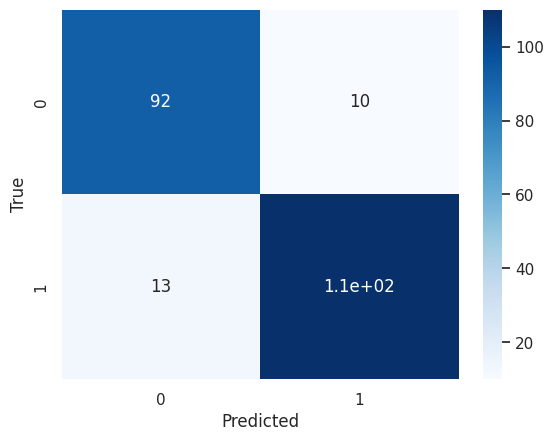

In [79]:
import seaborn as sns

print(["K" if x == "Kecimen" in x else "B" for x in mlp_model_prediction])    # prediction
print(["K" if x == "Kecimen" in x else "B" for x in test_target])             # real

print(confusion_matrix(test_target, mlp_model_prediction))

# Draw a heatmap according to the confusion matrix
sns.heatmap(confusion_matrix(test_target, mlp_model_prediction), annot = True, cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()